### Visualize random samples

Don't forget to update all paths

In [9]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from io import BytesIO

In [10]:
# QA_INFO_DATAPATH = "/home/yipenglin/Spring2022_MMML_Project/dataset/WebQA/WebQA_train_val_small.json"
QA_INFO_DATAPATH = "/home/yipenglin/Spring2022_MMML_Project/dataset/WebQA/WebQA_train_val.json"
IMG_LINEIDX = "/home/yipenglin/Spring2022_MMML_Project/dataset/WebQA/imgs.lineidx"
TSV_FILEPATH = "/media/UoneWorkspace/MMML_dataset/dataset/WebQA/WebQA_imgs_7z_chunks/imgs.tsv"

In [11]:
dataset = json.load(open(QA_INFO_DATAPATH, "r"))
print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
print(Counter([dataset[k]['Qcate'] for k in dataset]))


Counter({'train': 36766, 'val': 4966})
41732
Counter({'text': 20267, 'YesNo': 7320, 'Others': 5412, 'choose': 4220, 'number': 2118, 'color': 1830, 'shape': 565})


In [12]:
count = 0
for k in dataset:
    if dataset[k]['Qcate'] == 'text': continue
    for im in dataset[k]['img_posFacts']:
        if 'Litoria caerulea' in im['caption']:
            print("\n", k)
            pprint(dataset[k])
            count += 1
print(count)


 d5c5bcf60dba11ecb1e81171463288e9
{'A': ['"The belly of a Green Tree Frog is white."'],
 'Guid': 'd5c5bcf60dba11ecb1e81171463288e9',
 'Q': '"What color is the belly of a Green Tree Frog?"',
 'Qcate': 'color',
 'img_negFacts': [{'caption': 'Green Tree Frog on verandah tiles 2  Taken in '
                              'Chinchilla at a staff house I was staying at.',
                   'image_id': 30348447,
                   'imgUrl': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Green_Tree_Frog_on_verandah_tiles_2.JPG/800px-Green_Tree_Frog_on_verandah_tiles_2.JPG',
                   'title': 'Green Tree Frog on verandah tiles 2',
                   'url': 'https://commons.wikimedia.org/wiki/File:Green_Tree_Frog_on_verandah_tiles_2.JPG'},
                  {'caption': 'Green Tree Frog - Hyla cinerea, Julie Metz '
                              'Wetlands, Woodbridge, Virginia Green Tree Frog '
                              '- Hyla cinerea, Julie Metz Wetlands, '
            

In [13]:
with open(IMG_LINEIDX, "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


In [14]:
k = random.choice(list(dataset.keys()))
k

'd5ceac3a0dba11ecb1e81171463288e9'

In [15]:
### Txt-based queries
show_distractors = False

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] == 'text': break

print(k)
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

d5d054ae0dba11ecb1e81171463288e9
Q =  How are the candidates selected for the Dr. Beattie Martin Trophy and the Frank M. Gibson Trophy?

A =
['Each of the teams nominate a player to be a candidate for these trophies.']

------ Positive Evidence ------ 
The Frank M. Gibson Trophy is a Canadian Football League trophy, given to the most outstanding rookie in the East Division. Each team from the East Division nominates a candidate from which a winner is chosen, and either this winner or the winner of the Jackie Parker Trophy will receive the Canadian Football League Most Outstanding Rookie Award .
https://en.wikipedia.org/wiki/Frank_M._Gibson_Trophy
Each team nominates a player for this award, from which the winner is chosen. Either the winner of this trophy or the winner of the Lew Hayman Trophy will also win the Canadian Football League Most Outstanding Canadian award . The Martin trophy is named after former Saskatchewan Roughriders president Beattie Martin.
https://en.wikipedia.org/wi

d5c4166c0dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
d5cc3c660dba11ecb1e81171463288e9
Q =  "On the Krusty Burger store sign in Cuenca, Ecuador, which Simpsons characters are featured?"

A =
['"The Simpsons characters featured are Homer and Bart on the Krusty Burger '
 'store sign in Cuenca, Ecuador."']

------ Positive Evidence ------ 
showing img id 30174997
jump to the following line based on lineidx 174997
which is in TSV 32384819402
30174997 30174997
https://commons.wikimedia.org/wiki/File:Krosty_Burger_en_Cuenca%2C_Ecuador-_2013-10-12_12-40.jpg
Caption =  Krosty Burger en Cuenca, Ecuador- 2013-10-12 12-40


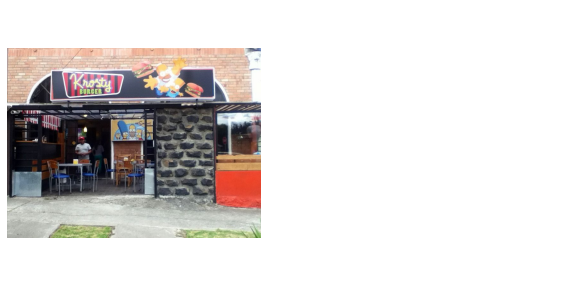

In [20]:
### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


for k in dataset:
    #k = random.choice(list(dataset.keys()))
    #if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
    if (not dataset[k]['Qcate'] == 'text') and 'simpson' in dataset[k]['Q'].lower():
        #if random.random()>0.1: continue
        print(k)
k = 'd5cc3c660dba11ecb1e81171463288e9'
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    print("showing img id", image_id)
    with open(TSV_FILEPATH, "r") as fp:
        print("jump to the following line based on lineidx", int(image_id)%10000000)
        print("which is in TSV", lineidx[int(image_id)%10000000])
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = Image.open(BytesIO(base64.b64decode(img_base64)))    
    ax.imshow(im)
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])

### Display a Randomly Selected Image

total img 389750
img_id raw 161594
img_id 161594
img_label 0


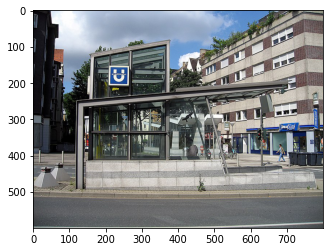

In [45]:
# The total number of images is 
TOTAL_IMGS = len(lineidx)

# randomly pick one
img_id = random.randint(0, TOTAL_IMGS-1)

# get the image line index based on the lineidx
img_pos_in_TSV = lineidx[img_id % 1000000]

print("total img", TOTAL_IMGS)
print("img_id raw", img_id)
print("img_id", img_id % 1000000)
print("img_label", img_id // 10000000) # this example cannot display the image label, because the label is concealled in the id which is stored in the JSON file of the QA, e.g., WebQA_train_val.json.

# use seek function to locate to the target position
with open(TSV_FILEPATH, 'r') as fp:
    fp.seek(img_pos_in_TSV)
    imgid, img_base64 = fp.readline().strip().split('\t')

img = Image.open(BytesIO(base64.b64decode(img_base64)))
plt.imshow(img)


In [48]:
question_num = len(dataset)
random_question = random.randint(0, question_num-1)
question_keys = list(dataset.keys())
k = question_keys[random_question]
dataset[k]['img_posFacts']

[{'image_id': 30233725,
  'title': 'Rock and Roll Hall of Fame',
  'caption': 'Rock and Roll Hall of Fame The Rock and Roll Hall of Fame, Cleveland, Ohio; architect: I. M. Pei',
  'url': 'https://commons.wikimedia.org/wiki/File:Rock_and_Roll_Hall_of_Fame.jpg',
  'imgUrl': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Rock_and_Roll_Hall_of_Fame.jpg/731px-Rock_and_Roll_Hall_of_Fame.jpg'}]